# Competição Externa - BigData

texto texto texto

## Bibliotecas que serão usadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.cm import get_cmap

from pandas_profiling import ProfileReport

plt.style.use("ggplot")

## Lendo os dados


In [2]:
data = pd.read_csv("data/faturamento_lojas_atuais.csv")

data.head(10)

cod_loja   ano  mes categoria   qtde   receita
0         1  2016    1  CATEG_01  301.0   9164.86
1         1  2016    2  CATEG_01  187.0   8175.55
2         1  2016    3  CATEG_01  242.0  10521.67
3         1  2016    4  CATEG_01  104.0   4560.91
4         1  2016    5  CATEG_01  100.0   4263.30
5         1  2016    6  CATEG_01  108.0   4741.36
6         1  2016    7  CATEG_01  111.0   5604.77
7         1  2016    8  CATEG_01   86.0   3987.35
8         1  2016    9  CATEG_01  148.0   5543.12
9         1  2016   10  CATEG_01  147.0   4996.06

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003094 entries, 0 to 1003093
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cod_loja   1003094 non-null  int64  
 1   ano        1003094 non-null  int64  
 2   mes        1003094 non-null  int64  
 3   categoria  1003094 non-null  object 
 4   qtde       1003094 non-null  float64
 5   receita    1003094 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.9+ MB


Para o começo, vamos fazer um profilling.

In [4]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [5]:
profile.to_file("report-fla-1.html")

## Analise dos dados

### Receita / Qtde

Para começar a analise dos dados vamos criar mais um atributo, ele vai verificar a "Receita / Quantidade", vai ajudar a verificar a relação entre ambos os atributos.

In [6]:
data["rec_un"] = data["receita"] / data["qtde"]

data.head(10)

cod_loja   ano  mes categoria   qtde   receita     rec_un
0         1  2016    1  CATEG_01  301.0   9164.86  30.448040
1         1  2016    2  CATEG_01  187.0   8175.55  43.719519
2         1  2016    3  CATEG_01  242.0  10521.67  43.477975
3         1  2016    4  CATEG_01  104.0   4560.91  43.854904
4         1  2016    5  CATEG_01  100.0   4263.30  42.633000
5         1  2016    6  CATEG_01  108.0   4741.36  43.901481
6         1  2016    7  CATEG_01  111.0   5604.77  50.493423
7         1  2016    8  CATEG_01   86.0   3987.35  46.364535
8         1  2016    9  CATEG_01  148.0   5543.12  37.453514
9         1  2016   10  CATEG_01  147.0   4996.06  33.986803

Vamos agrupar as categorias e fazer analises a partir delas.

In [7]:
data_categorias = data.groupby(["categoria"])

Vamos verificar a receita unitaria por categoria.

In [8]:
# Categoria, Soma da receita, Soma da receita unitária, Média da receita unitária
receita_unitaria_categoria = [[], [], [], []]

print("Categoria\t\tReceita\t\t\tReceitaUnitária")

for (cat, df) in data_categorias:
    receita_unitaria_categoria[0].append(cat)
    receita_unitaria_categoria[1].append(df.receita.sum())
    receita_unitaria_categoria[2].append(df.rec_un.sum())
    receita_unitaria_categoria[3].append(df.rec_un.mean())
    print("{}\t\t{:.3f}\t\t{:.3f}".format(
        receita_unitaria_categoria[0][len(receita_unitaria_categoria[0]) - 1],
        receita_unitaria_categoria[1][len(receita_unitaria_categoria[0]) - 1],
        receita_unitaria_categoria[2][len(receita_unitaria_categoria[1]) - 1])
    )

Categoria		Receita			ReceitaUnitária
CATEG_01		69459537.750		2125339.350
CATEG_02		7507082.780		1580406.550
CATEG_03		335854146.210		2171944.377
CATEG_04		116636953.570		2746816.951
CATEG_05		1189124313.640		2959746.941
CATEG_06		104199931.450		3824528.893
CATEG_07		569669595.370		1643342.829
CATEG_08		722160378.980		7555989.557
CATEG_09		941137765.890		2617596.438
CATEG_10		178655007.820		3554679.373
CATEG_11		4610573177.400		6739007.524
CATEG_12		445713418.950		1277777.579
CATEG_13		35811032.090		2959447.095
CATEG_14		36804060.180		185576.080
CATEG_15		30879.540		24446.548
CATEG_16		299.900		59.980


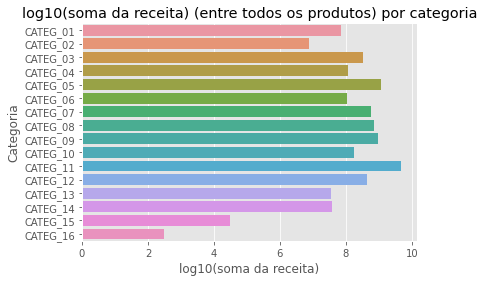

In [9]:
sns.barplot(y = receita_unitaria_categoria[0], x = np.log10(receita_unitaria_categoria[1]), orient = "h")

plt.title("log10(soma da receita) (entre todos os produtos) por categoria")
plt.xlabel("log10(soma da receita)")
plt.ylabel("Categoria")

plt.show()


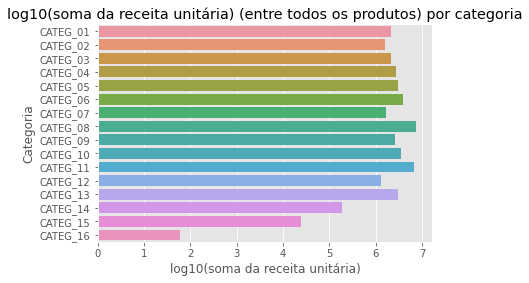

In [10]:
sns.barplot(y = receita_unitaria_categoria[0], x = np.log10(receita_unitaria_categoria[2]), orient = "h")

plt.title("log10(soma da receita unitária) (entre todos os produtos) por categoria")
plt.xlabel("log10(soma da receita unitária)")
plt.ylabel("Categoria")

plt.show()

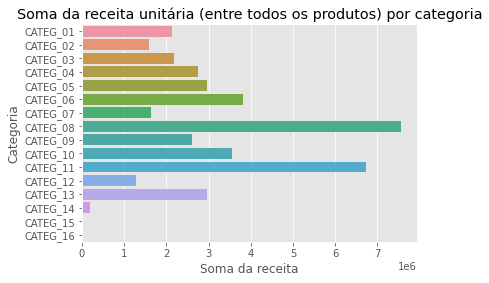

In [11]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[2], orient = "h")

plt.title("Soma da receita unitária (entre todos os produtos) por categoria")
plt.xlabel("Soma da receita")
plt.ylabel("Categoria")

plt.show()

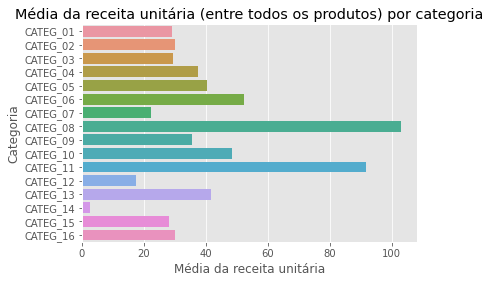

In [12]:
sns.barplot(y = receita_unitaria_categoria[0], x = receita_unitaria_categoria[3], orient = "h")

plt.title("Média da receita unitária (entre todos os produtos) por categoria")
plt.xlabel("Média da receita unitária")
plt.ylabel("Categoria")

plt.show()

Analisando os gráficos obtidos, podemos identificar algumas questões e analisés relevantes:
- A soma da receita da `CATEG_11` é muito alta comparada a todas as outras cateogiras, porém na receita unitária ela é menor que a `CATEG_08`, isso pode acontecer devido a quantidade de produtos vendido na categoria 11 é muita alta e os da categoria 08 tem um valor muito alto por unidade.

Mais alguns gráficos que vai ser importante verificar:
- Podemos analisar a quantidade de produtos vendidos por categoria e analisar a variação da quantidade de produtos por período.
- Devemos analisar se existe picos de datas em que alguma categoria se sobressai sobre a outra e também verificar quais categorias vendem mais em diferentes períodos.

### Lojas com categorias combinadas

Vamos verificar como a receita das lojas de acordo com as diferentes combinações de categorias.

In [13]:
data_lojas = data.groupby(["cod_loja"])

In [14]:
receita_lojas_cats = {}

for (loja, df) in data_lojas:
    # Verifica as diferentes categorias que aquela loja possui
    categorias = list(df.categoria.unique())
    identificador = "/".join(categorias)

    # Guarda a combinação de categorias
    if identificador in receita_lojas_cats:
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())
    else:
        receita_lojas_cats[identificador] = {
            "lojas": [],
            "receita": [],
            "rec_un": []
        }
        receita_lojas_cats[identificador]["lojas"].append(loja)
        receita_lojas_cats[identificador]["receita"].append(df.receita.sum())
        receita_lojas_cats[identificador]["rec_un"].append(df.rec_un.sum())

In [15]:
i = 0
for label in receita_lojas_cats:
    print(i, label, "\n")
    i = i + 1

0 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

1 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

2 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15/CATEG_16 

3 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14 

4 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13/CATEG_14/CATEG_15 

5 CATEG_01/CATEG_03/CATEG_04/CATEG_05/CATEG_06/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_13 

6 CATEG_03/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

7 CATEG_01/CATEG_04/CATEG_05/CATEG_07/CATEG_08/CATEG_09/CATEG_10/CATEG_11/CATEG_12/CATEG_14 

8 CATEG_01/CATEG_02/CATEG_03/CATEG_04/CAT

Vamos mostrar alguns gráficos.

In [16]:
receita_cats = [[], [], []]

i = 0
for label in receita_lojas_cats:
    receita_cats[0].append(i)
    receita_cats[1].append(np.mean(receita_lojas_cats[label]["rec_un"]))
    receita_cats[2].append(len(receita_lojas_cats[label]["lojas"]))

    i = i + 1

In [17]:
receita_cats

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [13413.788673544781,
  13757.307109139885,
  14197.255381891446,
  9702.379142078682,
  13375.656735334098,
  680.2752299396939,
  490.15250087077675,
  409.75298786181133,
  571.1965627196722],
 [2479, 605, 1, 37, 1, 4, 1, 1, 1]]

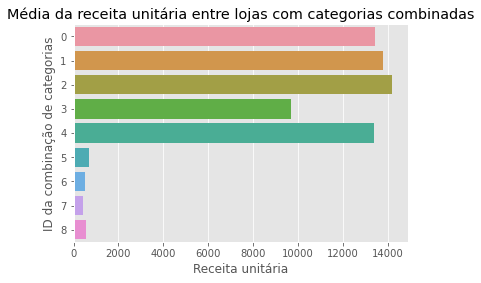

In [18]:
sns.barplot(y = receita_cats[0], x = receita_cats[1], orient = "h")

plt.title("Média da receita unitária entre lojas com categorias combinadas")
plt.xlabel("Receita unitária")
plt.ylabel("ID da combinação de categorias")

plt.show()

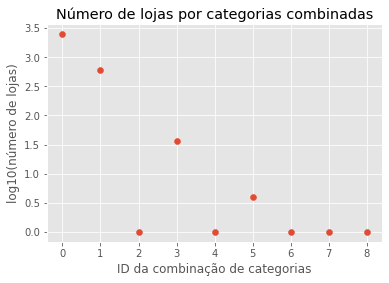

In [19]:
plt.scatter(receita_cats[0], np.log10(receita_cats[2]))

plt.xlabel("ID da combinação de categorias")
plt.ylabel("log10(número de lojas)")
plt.title("Número de lojas por categorias combinadas")

plt.show()

### Lidando com a data

Podemos deixar os dois atributos `mes, ano` em apenas um para facilitarm a visualização dos dados em diferentes períodos.

In [20]:
data["periodo"] = data["ano"].astype(str) + "/" + data["mes"].astype(str)

data.head(10)

cod_loja   ano  mes categoria   qtde   receita     rec_un  periodo
0         1  2016    1  CATEG_01  301.0   9164.86  30.448040   2016/1
1         1  2016    2  CATEG_01  187.0   8175.55  43.719519   2016/2
2         1  2016    3  CATEG_01  242.0  10521.67  43.477975   2016/3
3         1  2016    4  CATEG_01  104.0   4560.91  43.854904   2016/4
4         1  2016    5  CATEG_01  100.0   4263.30  42.633000   2016/5
5         1  2016    6  CATEG_01  108.0   4741.36  43.901481   2016/6
6         1  2016    7  CATEG_01  111.0   5604.77  50.493423   2016/7
7         1  2016    8  CATEG_01   86.0   3987.35  46.364535   2016/8
8         1  2016    9  CATEG_01  148.0   5543.12  37.453514   2016/9
9         1  2016   10  CATEG_01  147.0   4996.06  33.986803  2016/10

In [21]:
data_periodo = data.groupby("periodo", sort = False)

data_periodo.head()

cod_loja   ano  mes categoria    qtde    receita     rec_un  periodo
0           1  2016    1  CATEG_01   301.0    9164.86  30.448040   2016/1
1           1  2016    2  CATEG_01   187.0    8175.55  43.719519   2016/2
2           1  2016    3  CATEG_01   242.0   10521.67  43.477975   2016/3
3           1  2016    4  CATEG_01   104.0    4560.91  43.854904   2016/4
4           1  2016    5  CATEG_01   100.0    4263.30  42.633000   2016/5
..        ...   ...  ...       ...     ...        ...        ...      ...
115         1  2017    8  CATEG_05  1749.0   62146.01  35.532310   2017/8
116         1  2017    9  CATEG_05  2053.0   69288.90  33.750073   2017/9
117         1  2017   10  CATEG_05  2393.0   72079.84  30.121120  2017/10
118         1  2017   11  CATEG_05  2412.0   80089.67  33.204672  2017/11
119         1  2017   12  CATEG_05  4054.0  139537.60  34.419734  2017/12

[120 rows x 8 columns]

Agora que temos os dados por periodo, podemos ter construir gráficos e analisar a variação da receita durante diferentes períodos.

In [22]:
# Peridoo, Soma da receita, Soma unitária, Quantidade de produtos registrado no período
receita_periodo = [[], [], [], []]

for (periodo, df) in data_periodo:
    receita_periodo[0].append(periodo)
    receita_periodo[1].append(df.receita.sum())
    receita_periodo[2].append(df.rec_un.sum())
    receita_periodo[3].append(len(df))

In [23]:
receita_periodo

[['2016/1',
  '2016/2',
  '2016/3',
  '2016/4',
  '2016/5',
  '2016/6',
  '2016/7',
  '2016/8',
  '2016/9',
  '2016/10',
  '2016/11',
  '2016/12',
  '2017/1',
  '2017/2',
  '2017/3',
  '2017/4',
  '2017/5',
  '2017/6',
  '2017/7',
  '2017/8',
  '2017/9',
  '2017/10',
  '2017/11',
  '2017/12'],
 [364784885.18,
  258856554.21999997,
  308149053.94,
  316512361.31999993,
  455139463.60999995,
  381751283.27,
  316441839.51,
  379963075.99999994,
  314348342.2099999,
  342437947.8599999,
  398008640.85999995,
  798514916.3100001,
  320239402.79999995,
  271138378.7,
  329741026.83,
  317465906.17999995,
  484526962.46000004,
  407682016.53,
  312799418.05,
  402550481.5399999,
  333495140.21999997,
  327269302.14,
  436271894.93,
  785249286.85],
 [1339097.5880516798,
  1444428.8973037272,
  1591176.7372103666,
  1659021.5973224633,
  1653743.779890729,
  1712765.3875256574,
  1796971.9278093053,
  1840536.9691196603,
  1713068.2659489298,
  1609737.2162019894,
  1728218.7722152425,
  1881

#### Gráfico da receita por período (com todas as categorias)

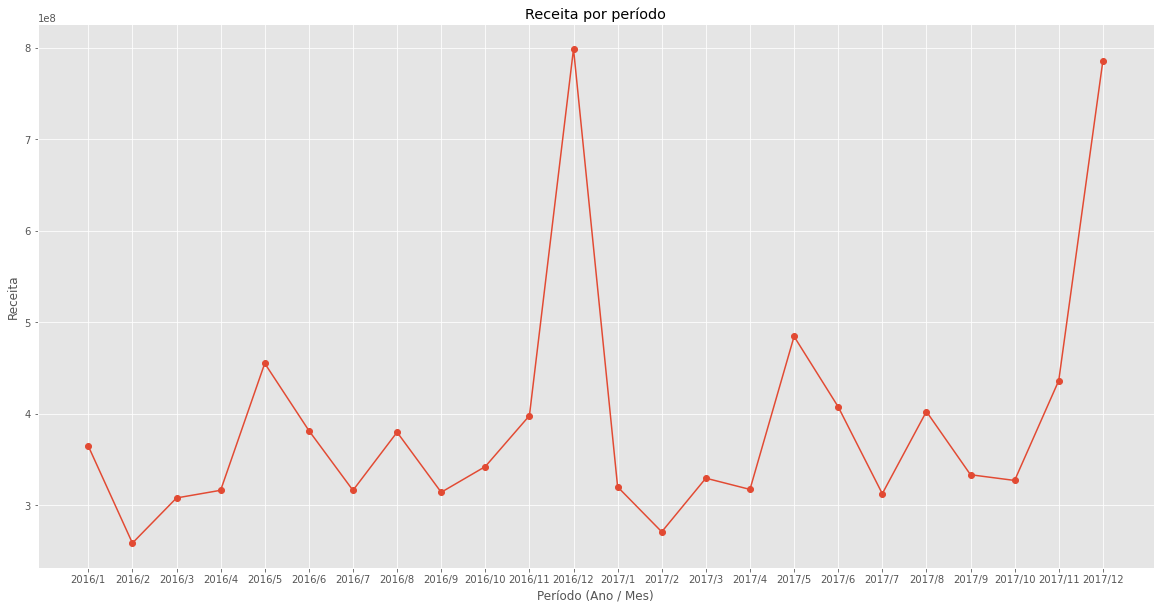

In [24]:
plt.figure(figsize = (20, 10))
plt.plot(receita_periodo[0], receita_periodo[1], marker = 'o')

plt.title("Receita por período")
plt.xlabel("Período (Ano / Mes)")
plt.ylabel("Receita")

plt.show()

##### Gráfico da receita unitária de acordo com o tempo (com todas as categorias)

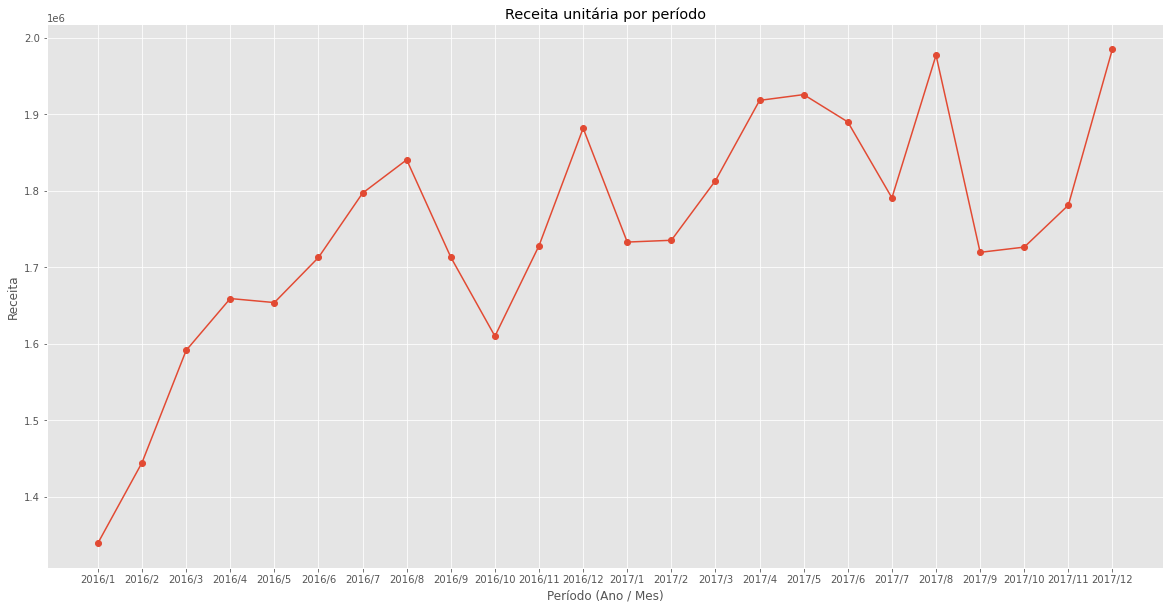

In [25]:
plt.figure(figsize = (20, 10))
plt.plot(receita_periodo[0], receita_periodo[2], marker = 'o')

plt.title("Receita unitária por período")
plt.xlabel("Período (Ano / Mes)")
plt.ylabel("Receita")

plt.show()

Outros gráficos que podem ser criados é a receita entre as diferentes categorias.

In [26]:
# Categoria = {Periodo, Receita, ReceitaUnitaria}
receita_cats_periodo = {}

for (periodo, df) in data_periodo:
    categorias_faltando_no_periodo = list(data.categoria.unique())

    for (cat, df_cat) in df.groupby(["categoria"]):
        categorias_faltando_no_periodo.remove(cat)

        if cat in receita_cats_periodo:
            receita_cats_periodo[cat]["receita"].append(df_cat.receita.sum())
            receita_cats_periodo[cat]["rec_un"].append(df_cat.rec_un.sum())
            receita_cats_periodo[cat]["periodo"].append(periodo)
            receita_cats_periodo[cat]["qtde"].append(df_cat.qtde.sum())
        else:
            receita_cats_periodo[cat] = {
                "receita": [],
                "rec_un": [],
                "periodo": [],
                "qtde": []
            }
            receita_cats_periodo[cat]["receita"].append(df_cat.receita.sum())
            receita_cats_periodo[cat]["rec_un"].append(df_cat.rec_un.sum())
            receita_cats_periodo[cat]["periodo"].append(periodo)
            receita_cats_periodo[cat]["qtde"].append(df_cat.qtde.sum())
    
    # Garante que as categorias que não venderam no periodo terão o valor 0 no seu conjunto de dados
    for cat in categorias_faltando_no_periodo:
        if cat in receita_cats_periodo:
            receita_cats_periodo[cat]["receita"].append(0)
            receita_cats_periodo[cat]["rec_un"].append(0)
            receita_cats_periodo[cat]["periodo"].append(periodo)
            receita_cats_periodo[cat]["qtde"].append(0)
        else:
            receita_cats_periodo[cat] = {
                "receita": [],
                "rec_un": [],
                "periodo": [],
                "qtde": []
            }
            receita_cats_periodo[cat]["receita"].append(0)
            receita_cats_periodo[cat]["rec_un"].append(0)
            receita_cats_periodo[cat]["periodo"].append(periodo)
            receita_cats_periodo[cat]["qtde"].append(0)


In [27]:
print(receita_cats_periodo)

0, 104251.0, 106887.0, 93047.0, 82739.0, 67078.0, 69939.0, 85440.0, 78212.0, 130310.0, 85622.0, 52976.0, 73037.0, 63851.0, 97518.0, 87031.0, 157331.0, 141206.0, 124525.0, 120111.0, 127826.0, 186643.0]}, 'CATEG_02': {'receita': [514115.7, 580570.31, 336562.18000000005, 318389.47000000003, 329641.22, 337132.57, 295892.85, 277285.62, 275830.29000000004, 275477.17000000004, 278550.28, 482800.88, 302974.05, 302311.88, 310598.28, 277460.27, 296842.44, 380313.28, 238472.45, 201368.04, 207017.47999999998, 159754.71, 264958.37, 262762.99], 'rec_un': [59076.829558657075, 47089.5001933234, 72183.32526964211, 72071.20822633812, 73972.7767586696, 65242.67786613964, 69910.22399948753, 71075.82082846528, 69193.39923567744, 69676.20024730182, 69844.89173719613, 77127.34814972908, 66171.70858530857, 62706.97519548901, 72031.503958077, 71892.88326923076, 74072.92647824399, 61414.016167833775, 68147.51278989957, 64789.99976247435, 53643.509976635614, 48310.833142160554, 56695.00682398575, 64065.472032634

#### Gráfico da soma da receita das diferentes categorias em relação ao tempo

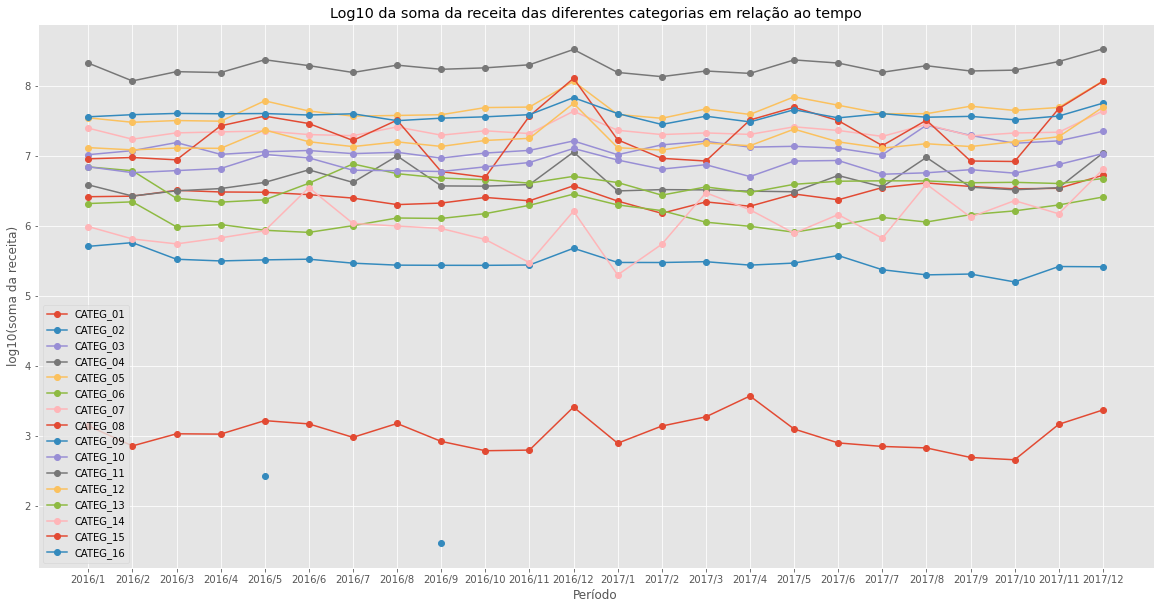

In [28]:
plt.figure(figsize = (20, 10))

for cat in receita_cats_periodo:
    plt.plot(receita_periodo[0], np.log10(receita_cats_periodo[cat]["receita"]), label = cat, marker = "o")

plt.legend()
plt.title("Log10 da soma da receita das diferentes categorias em relação ao tempo")
plt.xlabel("Período")
plt.ylabel("log10(soma da receita)")

plt.show()

Podemos ver pelo gráfico acima que a `CATEG_11` é predominante durante todo o tempo e é difiícil visualizar os dados dessa forma, então vamos ver a receita de cada categoria de forma separada.

#### Gráficos da soma da receita para cada categoria

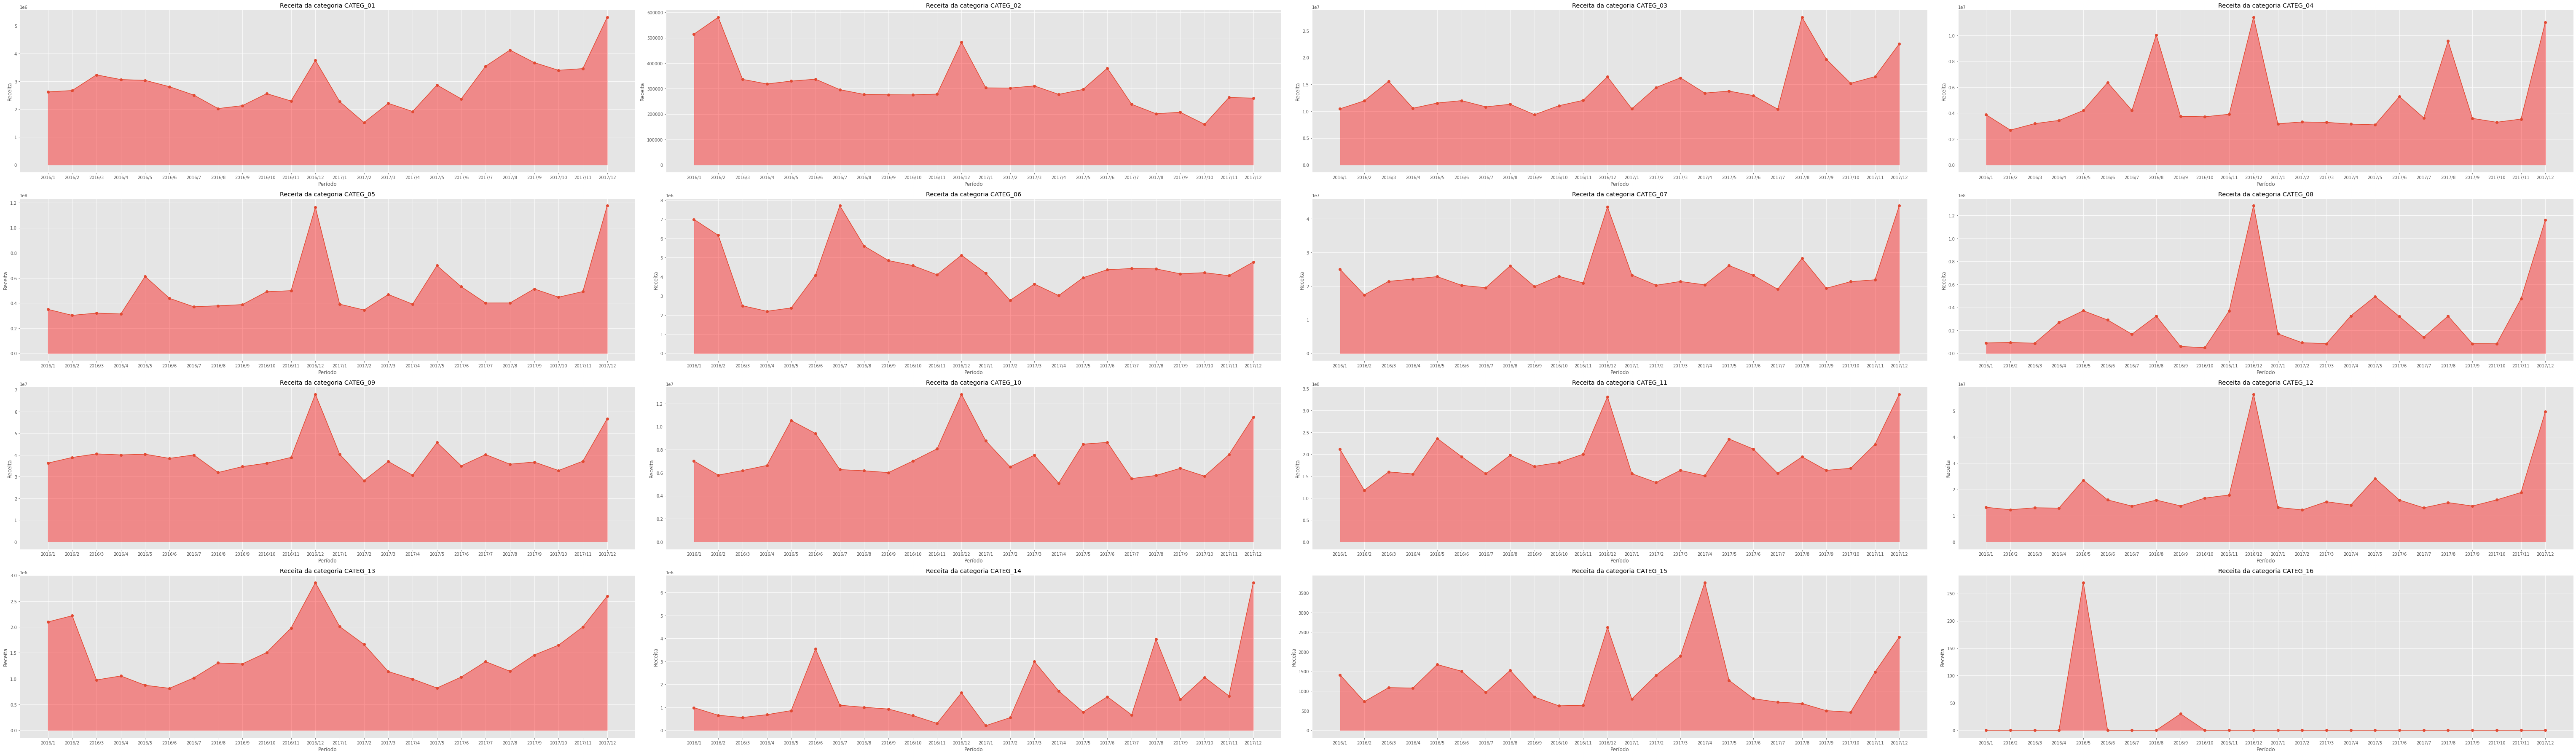

In [29]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["receita"], marker = "o")
    plt.fill_between(receita_periodo[0], receita_cats_periodo[cat]["receita"], color = "red", alpha = 0.4)

    plt.title("Receita da categoria {}".format(cat))
    plt.xlabel("Período")
    plt.ylabel("Receita")

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

#### Gráficos da soma da receita unitária de cada categoria

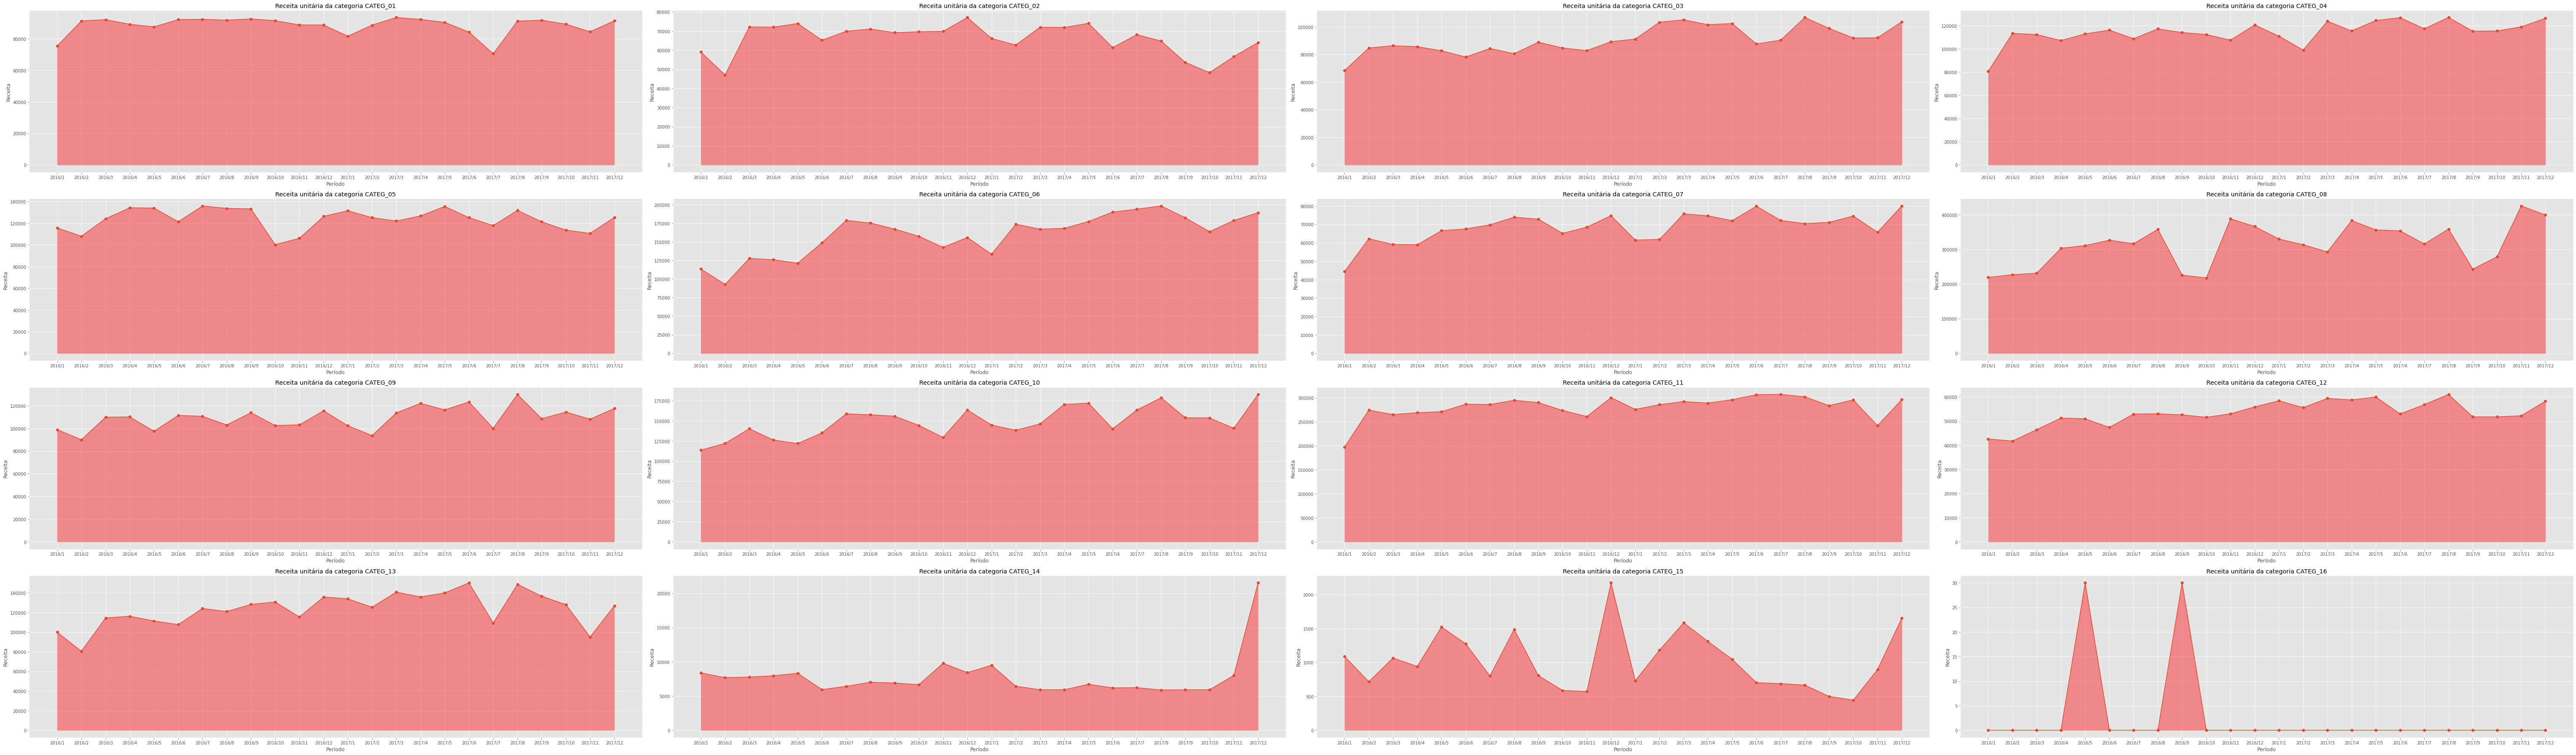

In [30]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    plt.plot(receita_periodo[0], receita_cats_periodo[cat]["rec_un"], marker = "o")
    plt.fill_between(receita_periodo[0], receita_cats_periodo[cat]["rec_un"], color = "red", alpha = 0.4)

    plt.title("Receita unitária da categoria {}".format(cat))
    plt.xlabel("Período")
    plt.ylabel("Receita")

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

Alguns gráficos mostram uma variação pequena na $Receita / Quantidade$, mas podemos levantar diversas questões:
- A quantidade também mudou de acordo com o tempo?
- Podemos tentar explicar a variação da receita unitária em certas categorias (8, 14, 15)?
- Se compararmos a receita e receita unitária entre os dois anos podemos observar alguma variação?

#### Gráficos da variação da receita entre os meses dos anos de 2016 e 2017

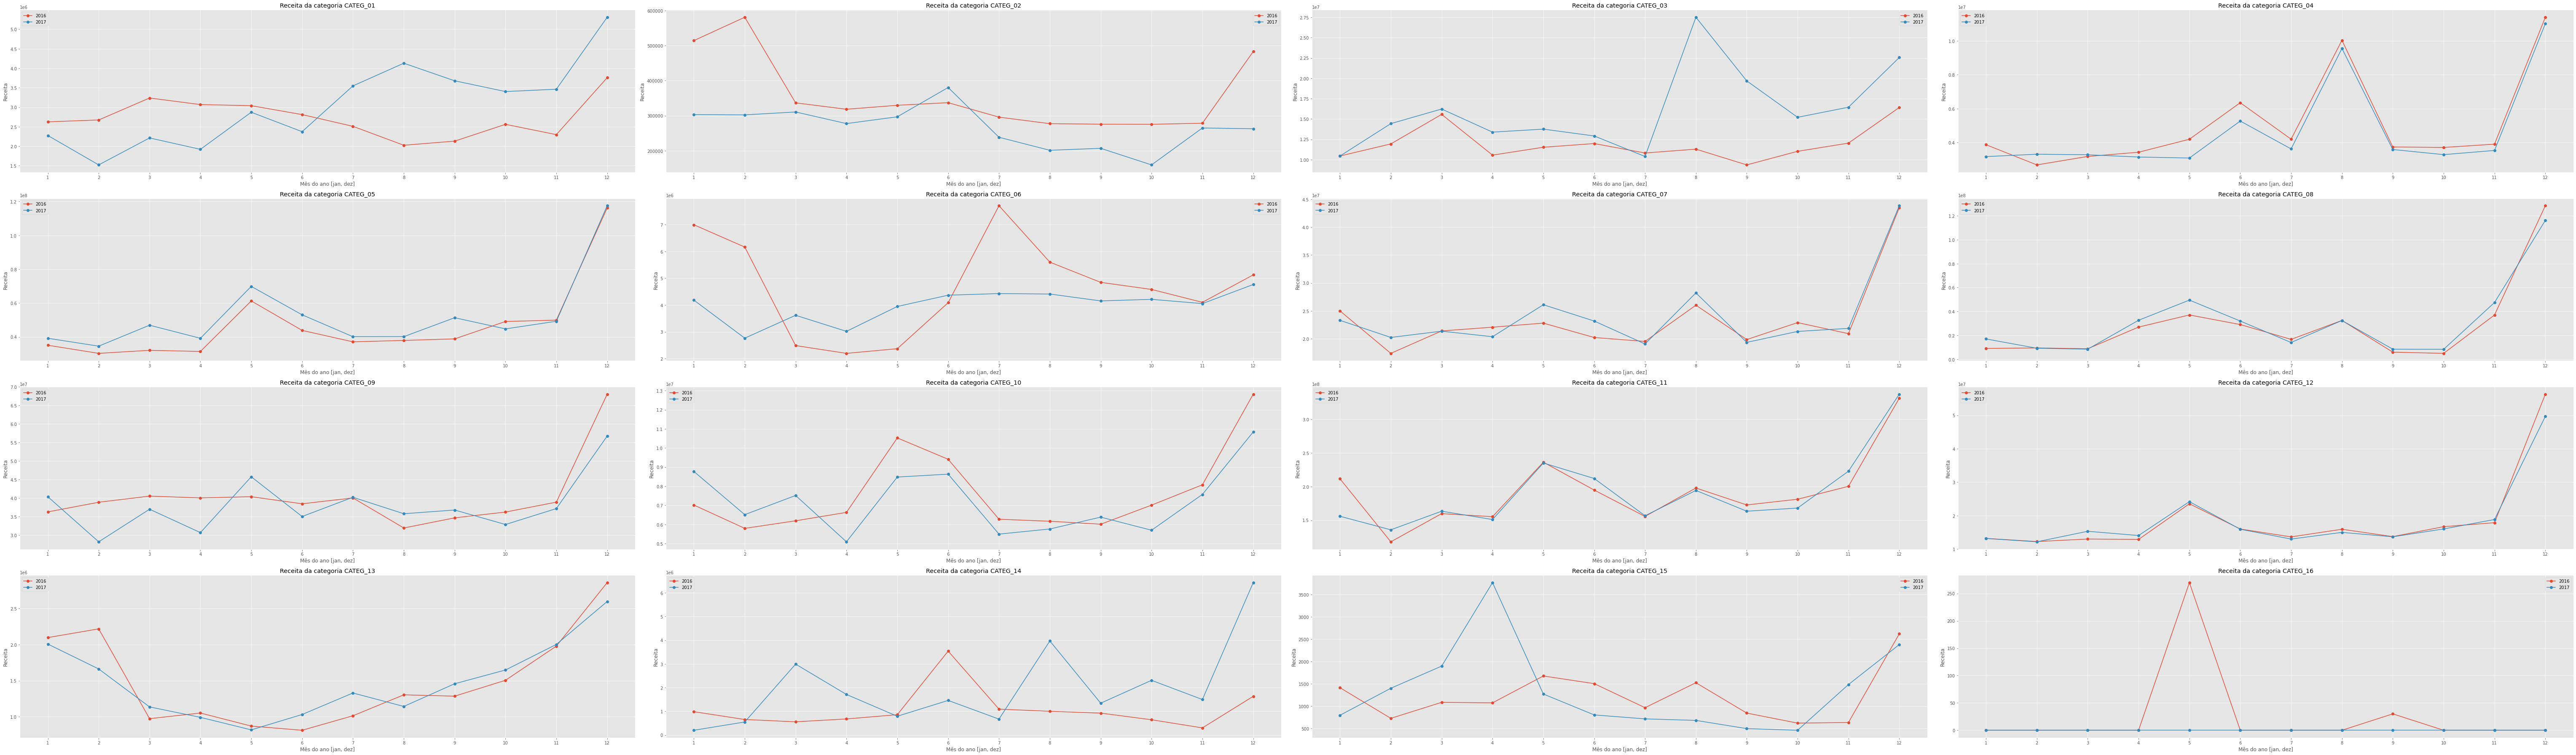

In [31]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    x_labels = pd.Series(receita_periodo[0][0:int(len(receita_periodo[0]) / 2)])
    x_labels = x_labels.apply(lambda x: x[5:])

    plt.plot(x_labels, receita_cats_periodo[cat]["receita"][0:int(len(receita_periodo[0]) / 2)], marker = "o", label = "2016")
    plt.plot(x_labels, receita_cats_periodo[cat]["receita"][int(len(receita_periodo[0]) / 2):], marker = "o", label = "2017")

    plt.title("Receita da categoria {}".format(cat))
    plt.xlabel("Mês do ano [jan, dez]")
    plt.ylabel("Receita")
    plt.legend()

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

#### Gráficos da variação da receita entre os meses dos anos de 2016 e 2017

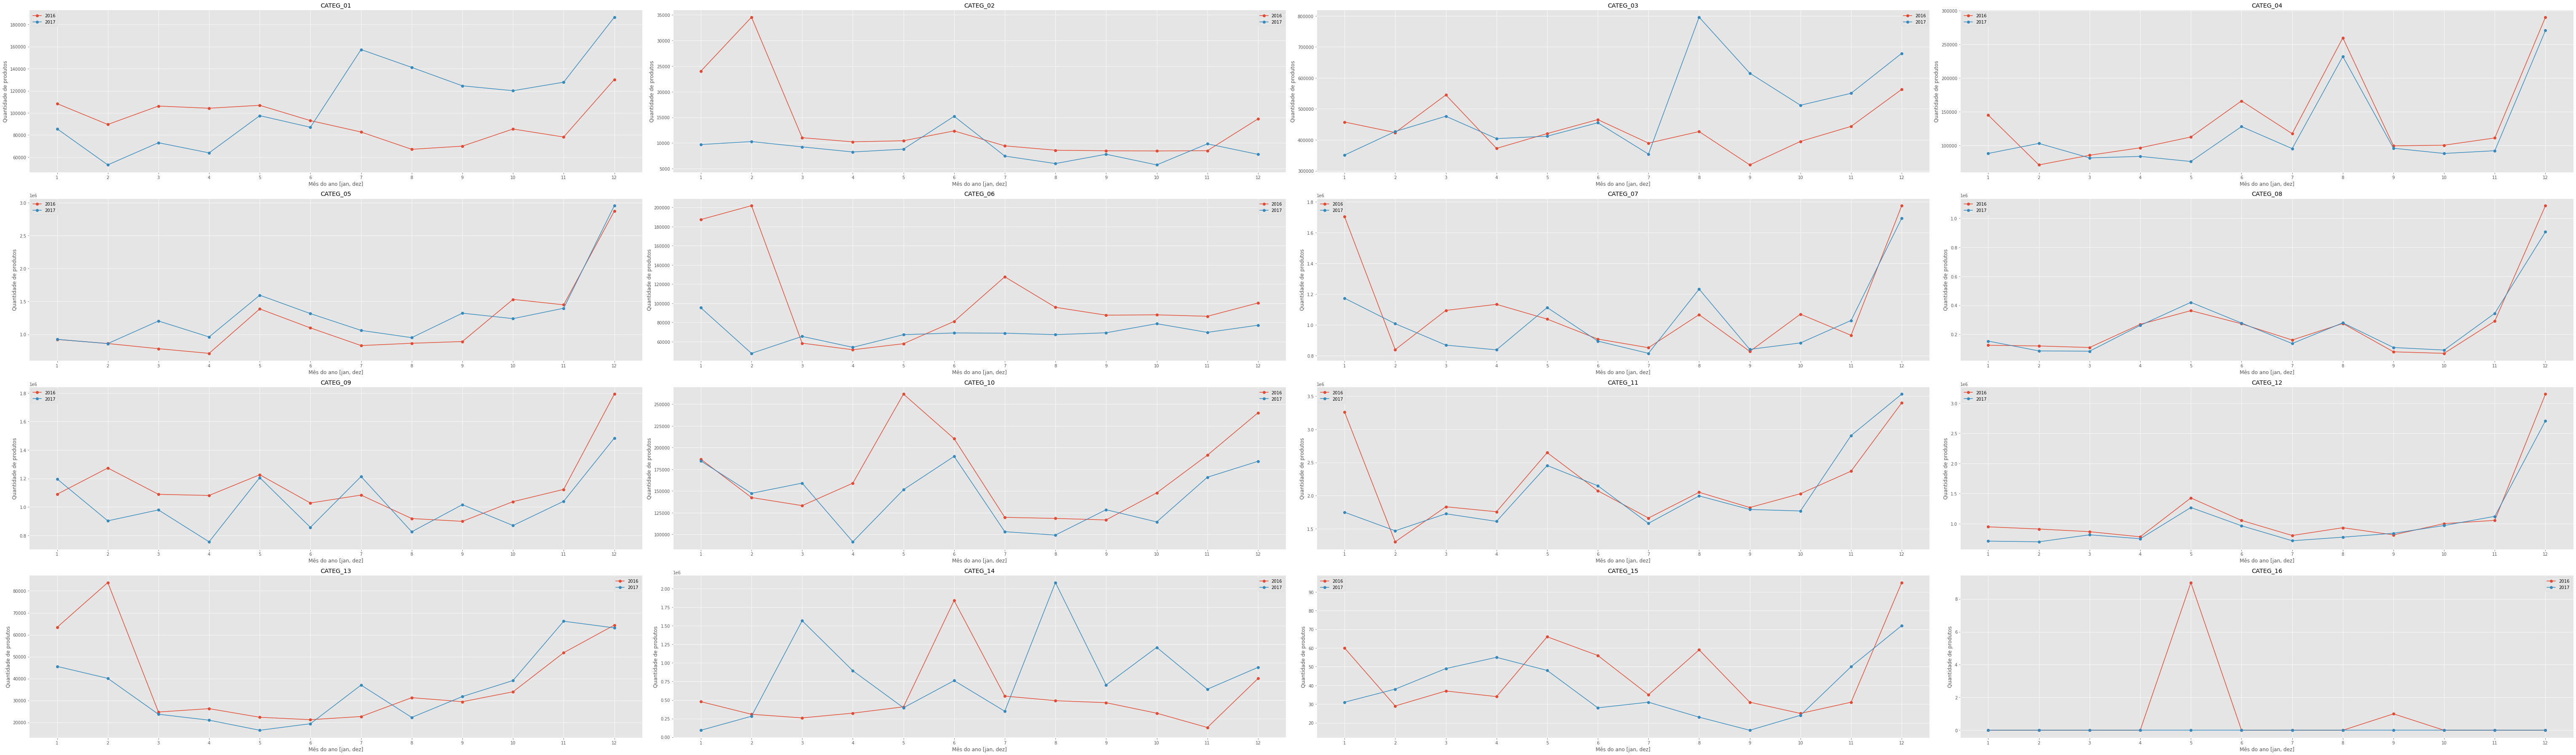

In [32]:
plt.figure(figsize = (85, 25))

plt_i = 1

for cat in receita_cats_periodo:
    plt.subplot(4, 4, plt_i)

    x_labels = pd.Series(receita_periodo[0][0:int(len(receita_periodo[0]) / 2)])
    x_labels = x_labels.apply(lambda x: x[5:])

    plt.plot(x_labels, receita_cats_periodo[cat]["qtde"][0:int(len(receita_periodo[0]) / 2)], marker = "o", label = "2016")
    plt.plot(x_labels, receita_cats_periodo[cat]["qtde"][int(len(receita_periodo[0]) / 2):], marker = "o", label = "2017")

    plt.title("{}".format(cat))
    plt.xlabel("Mês do ano [jan, dez]")
    plt.ylabel("Quantidade de produtos")
    plt.legend()

    plt_i = plt_i + 1

plt.tight_layout()
plt.show()

Os gráficos mostram que tanto os atributos `receita e qtde` seguem uma correlação positiva. Então podemos tentar usar o atributo `rec_un` para o dataset das lojas atuais.

### Separação por loja

Agora que consigmos obter algumas relações entre os dados. Fai ser feito o seguinte:
- Para cada loja será criado um atributo `CAT_XX_REC_UNI_SUM`, esse atributo representará a soma da receita unitária da categoria da loja em cada período.
- ??
- ??
- ??

#### Criando o atributo CAT_XX_REC_UNI_SUM

Para fazer isso iremos separar em outro dataframe, salvar ele e no próximo notebook fazer merge com os dados da lojas_atuais.

- Atributo serve apenas para explorar os dados, não é possível usar ele no modelo já que poderia causar dataleak.

In [33]:
data_cod_loja = data.groupby("cod_loja")

data_cod_loja.head(10)

cod_loja   ano  mes categoria   qtde   receita     rec_un  periodo
0               1  2016    1  CATEG_01  301.0   9164.86  30.448040   2016/1
1               1  2016    2  CATEG_01  187.0   8175.55  43.719519   2016/2
2               1  2016    3  CATEG_01  242.0  10521.67  43.477975   2016/3
3               1  2016    4  CATEG_01  104.0   4560.91  43.854904   2016/4
4               1  2016    5  CATEG_01  100.0   4263.30  42.633000   2016/5
...           ...   ...  ...       ...    ...       ...        ...      ...
1002768      3687  2016    6  CATEG_01   13.0    428.87  32.990000   2016/6
1002769      3687  2016    7  CATEG_01   17.0    400.38  23.551765   2016/7
1002770      3687  2016    8  CATEG_01    9.0    265.82  29.535556   2016/8
1002771      3687  2016    9  CATEG_01   14.0    403.59  28.827857   2016/9
1002772      3687  2016   10  CATEG_01   10.0    270.72  27.072000  2016/10

[31299 rows x 8 columns]

In [34]:
novos_atributos = ["cod_loja"] + list(pd.Series(data.categoria.unique()).apply(lambda x: x + "_REC_UNI_SUM"))
categorias = list(data.categoria.unique())

novos_atributos

['cod_loja',
 'CATEG_01_REC_UNI_SUM',
 'CATEG_02_REC_UNI_SUM',
 'CATEG_03_REC_UNI_SUM',
 'CATEG_04_REC_UNI_SUM',
 'CATEG_05_REC_UNI_SUM',
 'CATEG_06_REC_UNI_SUM',
 'CATEG_07_REC_UNI_SUM',
 'CATEG_08_REC_UNI_SUM',
 'CATEG_09_REC_UNI_SUM',
 'CATEG_10_REC_UNI_SUM',
 'CATEG_11_REC_UNI_SUM',
 'CATEG_12_REC_UNI_SUM',
 'CATEG_13_REC_UNI_SUM',
 'CATEG_14_REC_UNI_SUM',
 'CATEG_15_REC_UNI_SUM',
 'CATEG_16_REC_UNI_SUM']

In [37]:
rec_un_sum = data.groupby(["cod_loja", "periodo", "categoria"]).sum()[["rec_un", "receita"]]

rec_un_sum

rec_un   receita
cod_loja periodo categoria                     
1        2016/1  CATEG_01   30.448040   9164.86
                 CATEG_02   18.710146   2563.29
                 CATEG_03   17.681055  25973.47
                 CATEG_04   20.887171   5242.68
                 CATEG_05   30.919290  35711.78
...                               ...       ...
3687     2017/9  CATEG_10   50.141379   1454.10
                 CATEG_11   95.443590  18611.50
                 CATEG_12   13.760513   2683.30
                 CATEG_13   51.150000    613.80
                 CATEG_14    1.900000     62.70

[1003094 rows x 2 columns]

In [40]:
data_rec_uni_list = []

for (cod_loja, df) in rec_un_sum.groupby(level = 0):
    for (periodo, df_m) in df.groupby(level = 1):
        dados = {"cod_loja": cod_loja, "mes": periodo[5:], "ano": periodo[:4], "receita": 0}
        categorias_faltando = categorias.copy()

        for (cat, df_cat) in df_m.groupby(level = 2):
            rec_uni_cat = df_cat.rec_un.sum()
            rec_sum = df_cat.receita.sum()
            dados[cat + "_REC_UNI_SUM"] = rec_uni_cat
            dados["receita"] = dados["receita"] + rec_sum

            categorias_faltando.remove(cat)
        
        for cat in categorias_faltando:
            dados[cat + "_REC_UNI_SUM"] = 0
        
        data_rec_uni_list.append(dados)

In [21]:
len(data_rec_uni_list)

73644

In [22]:
data_rec_uni = pd.DataFrame(data_rec_uni_list)

data_rec_uni.head(10)

cod_loja mes   ano  CATEG_01_REC_UNI_SUM  CATEG_02_REC_UNI_SUM  \
0         1   1  2016             30.448040             18.710146   
1         1  10  2016             33.986803             25.142785   
2         1  11  2016             30.296667             22.965600   
3         1  12  2016             33.188182             22.833700   
4         1   2  2016             43.719519             14.485492   
5         1   3  2016             43.477975             26.278310   
6         1   4  2016             43.854904             24.157973   
7         1   5  2016             42.633000             24.681429   
8         1   6  2016             43.901481             20.886563   
9         1   7  2016             50.493423             25.133000   

   CATEG_03_REC_UNI_SUM  CATEG_04_REC_UNI_SUM  CATEG_05_REC_UNI_SUM  \
0             17.681055             20.887171             30.919290   
1             22.226022             28.956952             32.771997   
2             22.187400             27.690281             32.802101   
3             22.379621             30.352067             33.086141   
4             21.231583             29.384186             30.219876   
5             20.658129             26.207750             33.457240   
6             21.577149             26.865822             35.752198   
7             21.848249             28.787662             36.073658   
8             20.357034             30.024159             33.486254   
9             21.542408             29.295046             38.762777   

   CATEG_06_REC_UNI_SUM  CATEG_07_REC_UNI_SUM  CATEG_08_REC_UNI_SUM  \
0             31.706400             12.752683             45.436331   
1             42.858374             17.631987             41.811359   
2             40.951661             18.519352             74.652824   
3             41.547036             19.352089             82.970158   
4             27.586336             16.231631             45.729259   
5             32.569820             15.714753             77.886959   
6             33.509444             16.205060             78.457093   
7             36.646335             18.010034             75.066114   
8             42.815038             18.045593             69.815600   
9             54.083352             18.163149             72.072948   

   CATEG_09_REC_UNI_SUM  CATEG_10_REC_UNI_SUM  CATEG_11_REC_UNI_SUM  \
0             31.821209             33.360000             62.851924   
1             37.372261             38.705058             82.078196   
2             37.440439             39.748432             82.564317   
3             41.299231             43.706934             87.137583   
4             27.168227             34.105365             72.724494   
5             34.295991             37.535210             71.044491   
6             33.052549             33.612010             73.975475   
7             28.245030             33.239175             75.531876   
8             31.533548             37.018100             79.868303   
9             34.100943             40.712444             81.853739   

   CATEG_12_REC_UNI_SUM  CATEG_13_REC_UNI_SUM  CATEG_14_REC_UNI_SUM  \
0             11.310872             26.077014             20.426667   
1             16.034466             41.617166              0.000000   
2             17.904426             33.312410             18.900000   
3             16.712837             37.271221             18.900000   
4             13.720239             25.093969             15.795000   
5             15.638119             31.824000              1.900000   
6             16.134321             32.087105              1.900000   
7             16.487814             31.081028              1.900000   
8             15.615509             29.958105              1.900000   
9             16.176428             38.547203              1.900000   

   CATEG_15_REC_UNI_SUM  CATEG_16_REC_UNI_SUM  
0                   0.0                   0.0  
1                  

In [23]:
data_merge.to_csv("data/data-rec-uni.csv", index = False)